In [144]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [145]:
data = pd.read_excel('(Responses)-1.xlsx')

In [146]:
data.head()

,Timestamp,What is your role?,What is your age group?,What is your educational background?,Which learning method do you prefer?\n,What do you value most in a learning environment?,How important is face-to-face interaction with teachers in your learning experience?,How comfortable are you with using techNology for learning?,How effective do you find traditional learning methods ?,What do you like most about traditional learning?,What challenges have you faced with traditional learning?,Have you used AI-based learning tools ?\n,"If yes, how effective do you find AI-based learning tools?",What do you like most about AI-based learning?,What challenges have you faced with AI-based learning?,Do you think AI-based learning will replace traditional learning in the future?,What role should AI play in education?,What do you think are the biggest advantages of AI-based learning?,What do you think are the biggest disadvantages of AI-based learning?,Do you have any suggestions for improving traditional learning methods?,Do you have any suggestions for improving AIbased learning methods?,Any other comments or feedback?,Gender
0,2025-03-09 16:11:16.623,Student,18–24,Undergraduate,Traditional Learning,"Flexibility in learning pace, Personalized lea...",4,5,4,That i see the instructor and ask him what i want,If the count of students so big that’s a problem,Yes,5.0,Any thing AI can make it easily and quickly,Sometimes it doesn’t answer correctly,No,AI should completely replace traditional methods,"Personalized learning experiences, Flexibility...","Lack of face-to-face interaction, Limited acce...",Make the instructor interacts more,I think it from Ai it self and his developers ...,That’s a really nice survey,Male
1,2025-03-09 16:14:57.589,Student,18–24,Undergraduate,A mix of both,Direct interaction with teachers,2,2,2,Mmmmm,NaN,Yes,3.0,Mmmmm....,NaN,No,AI should assist teachers but Not replace them,Flexibility in learning pace,Data privacy concerns,Mmmmmm,Mkhgb,Yubgg,Female
2,2025-03-09 16:22:37.494,Student,18–24,Undergraduate,A mix of both,"Flexibility in learning pace, Access to techNo...",3,4,3,Interaction with teachers,NaN,Yes,4.0,Easier than traditional and contain more resou...,Sometimes Not all the resources are available,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",NaN,NaN,NaN,Female
3,2025-03-09 16:23:58.407,Student,18–24,Undergraduate,A mix of both,"Direct interaction with teachers, Access to te...",4,5,3,No wifi issues Can ask whatever i want whenev...,NaN,Yes,4.0,NaN,NaN,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",NaN,NaN,NaN,Male
4,2025-03-09 16:34:37.289,Student,18–24,Undergraduate,AI-Based Learning,Flexibility in learning pace,2,5,4,NaN,NaN,Yes,5.0,NaN,NaN,Maybe,AI should completely replace traditional methods,Personalized learning experiences,Data privacy concerns,b,b,b,Male


In [147]:
# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

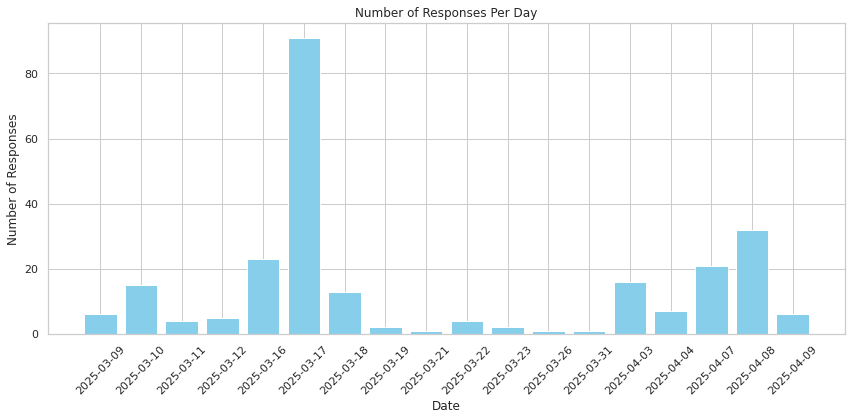

In [148]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a count of responses per day
data['Date'] = data['Timestamp'].dt.date
data['Count'] = 1

# Group by date and count the number of responses
daily_counts = data.groupby('Date')['Count'].sum().reset_index()
daily_counts['Date'] = pd.to_datetime(daily_counts['Date'])

# Plot as bar plot
plt.bar(daily_counts['Date'].dt.strftime('%Y-%m-%d'), daily_counts['Count'], color='skyblue')

# Add labels and title
plt.title('Number of Responses Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [149]:
import plotly.express as px
import pandas as pd

# Extract hour from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Count'] = 1

# Group by hour and count responses
hourly_counts = data.groupby('Hour')['Count'].sum().reset_index()

# Create bar plot with Plotly
fig = px.bar(hourly_counts,
             x='Hour',
             y='Count',
             title='Number of Responses by Hour of Day',
             labels={'Hour': 'Hour of Day (24-hour clock)', 'Count': 'Number of Responses'},
             color_discrete_sequence=['coral'])

# Customize layout
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

# Show plot
fig.show()


In [150]:
# Make a pie chart for Gender distribution using plotly
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Create a pie chart
fig = px.pie(gender_counts, values='Count', names='Gender',
             title='Gender Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()


In [151]:
# A sorted horizontal bar chart for What is your role? using plotly
import plotly.express as px
import pandas as pd

# Load the data
data = pd.read_excel('(Responses)-1.xlsx')
data['What is your role?'] = data['What is your role?'].astype(str)
data['What is your role?'] = data['What is your role?'].str.replace('nan', 'No response')
# Count the occurrences of each role
role_counts = data['What is your role?'].value_counts().reset_index()
role_counts.columns = ['Role', 'Count']
role_counts = role_counts.sort_values(by='Count', ascending=True)
# Create a horizontal bar chart
fig = px.bar(role_counts, x='Count', y='Role', orientation='h',
             title='Distribution of Roles',
             labels={'Count': 'Number of Responses', 'Role': 'Role'},
             color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(showlegend=False)
fig.show()

In [152]:
# Make a pie chart for Which learning method do you prefer? using plotly
# Count the occurrences of each learning method
learning_method_counts = data['Which learning method do you prefer?\n'].value_counts().reset_index()
learning_method_counts.columns = ['Learning Method', 'Count']

# Create a pie chart
fig = px.pie(learning_method_counts, values='Count', names='Learning Method',
             title='Preferred Learning Methods',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()


In [153]:
data.columns

Index(['Timestamp', 'What is your role?', 'What is your age group?',
       'What is your educational background?',
       'Which learning method do you prefer?\n',
       'What do you value most in a learning environment?',
       'How important is face-to-face interaction with teachers in your learning experience?',
       'How comfortable are you with using techNology for learning?',
       'How effective do you find traditional learning methods  ?',
       'What do you like most about traditional learning?',
       'What challenges have you faced with traditional learning?',
       'Have you used AI-based learning tools  ?\n',
       'If yes, how effective do you find AI-based learning tools?',
       'What do you like most about AI-based learning?',
       'What challenges have you faced with AI-based learning?',
       'Do you think AI-based learning will replace traditional learning in the future?',
       'What role should AI play in education?',
       'What do you think are t

In [154]:
# show all coulmns in the dataset for 5 rows
pd.set_option('display.max_columns', None)
data.head()

,Timestamp,What is your role?,What is your age group?,What is your educational background?,Which learning method do you prefer?\n,What do you value most in a learning environment?,How important is face-to-face interaction with teachers in your learning experience?,How comfortable are you with using techNology for learning?,How effective do you find traditional learning methods ?,What do you like most about traditional learning?,What challenges have you faced with traditional learning?,Have you used AI-based learning tools ?\n,"If yes, how effective do you find AI-based learning tools?",What do you like most about AI-based learning?,What challenges have you faced with AI-based learning?,Do you think AI-based learning will replace traditional learning in the future?,What role should AI play in education?,What do you think are the biggest advantages of AI-based learning?,What do you think are the biggest disadvantages of AI-based learning?,Do you have any suggestions for improving traditional learning methods?,Do you have any suggestions for improving AIbased learning methods?,Any other comments or feedback?,Gender
0,2025-03-09 16:11:16.623,Student,18–24,Undergraduate,Traditional Learning,"Flexibility in learning pace, Personalized lea...",4,5,4,That i see the instructor and ask him what i want,If the count of students so big that’s a problem,Yes,5.0,Any thing AI can make it easily and quickly,Sometimes it doesn’t answer correctly,No,AI should completely replace traditional methods,"Personalized learning experiences, Flexibility...","Lack of face-to-face interaction, Limited acce...",Make the instructor interacts more,I think it from Ai it self and his developers ...,That’s a really nice survey,Male
1,2025-03-09 16:14:57.589,Student,18–24,Undergraduate,A mix of both,Direct interaction with teachers,2,2,2,Mmmmm,NaN,Yes,3.0,Mmmmm....,NaN,No,AI should assist teachers but Not replace them,Flexibility in learning pace,Data privacy concerns,Mmmmmm,Mkhgb,Yubgg,Female
2,2025-03-09 16:22:37.494,Student,18–24,Undergraduate,A mix of both,"Flexibility in learning pace, Access to techNo...",3,4,3,Interaction with teachers,NaN,Yes,4.0,Easier than traditional and contain more resou...,Sometimes Not all the resources are available,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",NaN,NaN,NaN,Female
3,2025-03-09 16:23:58.407,Student,18–24,Undergraduate,A mix of both,"Direct interaction with teachers, Access to te...",4,5,3,No wifi issues Can ask whatever i want whenev...,NaN,Yes,4.0,NaN,NaN,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",NaN,NaN,NaN,Male
4,2025-03-09 16:34:37.289,Student,18–24,Undergraduate,AI-Based Learning,Flexibility in learning pace,2,5,4,NaN,NaN,Yes,5.0,NaN,NaN,Maybe,AI should completely replace traditional methods,Personalized learning experiences,Data privacy concerns,b,b,b,Male


In [155]:
# CLone the data
df = data.copy()

In [156]:
#remove Timestamp ,What do you value most in a learning environment?,What do you like most about traditional learning? ,What do you like most about AI-based learning?,What challenges have you faced with AI-based learning?,Do you have any suggestions for improving traditional learning methods?, Do you have any suggestions for improving AIbased learning methods?,Any other comments or feedback? from df
df = df.drop(['Timestamp', 
              'What do you value most in a learning environment?', 
              'What do you like most about traditional learning?', 
              'What do you like most about AI-based learning?', 
              'What challenges have you faced with AI-based learning?', 
              'Do you have any suggestions for improving traditional learning methods?', 
              'Do you have any suggestions for improving AIbased learning methods?', 
              'Any other comments or feedback?',
              'What challenges have you faced with traditional learning?'], axis=1)


In [ ]:
# Rename columns
df.columns = [
    'Role',
    'Age_Group',
    'Education',
    'Preferred_Learning_Method',
    'Importance_Face_to_Face',
    'Comfort_with_Technology',
    'Effectiveness_Traditional_Methods',
    'Used_AI_Tools',
    'Effectiveness_AI_Tools',
    'AI_Replace_Traditional',
    'AI_Role_in_Education',
    'Advantages_AI_Learning',
    'Disadvantages_AI_Learning',
    'Gender'
]

In [158]:
df.head()

,Role,Age_Group,Education,Preferred_Learning_Method,Importance_Face_to_Face,Comfort_with_Technology,Effectiveness_Traditional_Methods,Used_AI_Tools,Effectiveness_AI_Tools,AI_Replace_Traditional,AI_Role_in_Education,Advantages_AI_Learning,Disadvantages_AI_Learning,Gender
0,Student,18–24,Undergraduate,Traditional Learning,4,5,4,Yes,5.0,No,AI should completely replace traditional methods,"Personalized learning experiences, Flexibility...","Lack of face-to-face interaction, Limited acce...",Male
1,Student,18–24,Undergraduate,A mix of both,2,2,2,Yes,3.0,No,AI should assist teachers but Not replace them,Flexibility in learning pace,Data privacy concerns,Female
2,Student,18–24,Undergraduate,A mix of both,3,4,3,Yes,4.0,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",Female
3,Student,18–24,Undergraduate,A mix of both,4,5,3,Yes,4.0,Maybe,AI should assist teachers but Not replace them,"Flexibility in learning pace, Access to a wide...","Data privacy concerns, Limited access to techN...",Male
4,Student,18–24,Undergraduate,AI-Based Learning,2,5,4,Yes,5.0,Maybe,AI should completely replace traditional methods,Personalized learning experiences,Data privacy concerns,Male


In [159]:
df['Age_Group'].unique()

array(['18–24', 'Under 18', '25–34', '55+', '35–44', '45–54'],
      dtype=object)

In [160]:
# in age group replace Under 18 with 13-18 and 55+ with 55-100
df['Age_Group'] = df['Age_Group'].replace({'Under 18': '13-18', '55+': '55-100'})

In [161]:
# Ensure the column is string and fill missing values
df['Age_Group'] = df['Age_Group'].fillna('').astype(str)

# Replace en dash (–) with normal dash (-)
df['Age_Group'] = df['Age_Group'].str.replace('–', '-', regex=False)

# Now split safely
split_ages = df['Age_Group'].str.split('-', n=1, expand=True)

# Extract numbers
df['Age Lower Bound'] = split_ages[0].str.extract('(\d+)').astype(float)
df['Age Upper Bound'] = split_ages[1].str.extract('(\d+)').astype(float)

# Drop the original column
df = df.drop(['Age_Group'], axis=1)


In [162]:
# remove the word 'AI should ' from AI_Role_in_Education
df['AI_Role_in_Education'] = df['AI_Role_in_Education'].str.replace('AI should ', '')

In [163]:
# Apply one-hot encoding to selected columns and drop the first category
df = pd.get_dummies(df, columns=['Role', 'Education', 'Gender',
                                 'Used_AI_Tools'
                                 ,'AI_Replace_Traditional'], drop_first=False)

In [164]:
# show distinct Preferred_Learning_Method values
df['Preferred_Learning_Method'].unique()

array(['Traditional Learning  ', 'A mix of both', 'AI-Based Learning  '],
      dtype=object)

In [165]:
df['Preferred_Learning_Method'] = df['Preferred_Learning_Method'].str.strip()

In [166]:
# Fill NaNs with empty string to avoid errors
df['AI_Role_in_Education'] = df['AI_Role_in_Education'].fillna('')

# Initialize new columns
df['assist_teachers'] = 0
df['specific_tasks'] = 0
df['gathering_info'] = 0

# Create mapping
df.loc[df['AI_Role_in_Education'].str.contains('assist teachers', case=False), 'assist_teachers'] = 1
df.loc[df['AI_Role_in_Education'].str.contains('specific tasks', case=False), 'specific_tasks'] = 1
df.loc[df['AI_Role_in_Education'].str.contains('gathering info', case=False), 'gathering_info'] = 1

df = df.drop('AI_Role_in_Education', axis=1)


In [167]:
# Fill NaN with empty strings
df['Advantages_AI_Learning'] = df['Advantages_AI_Learning'].fillna('').astype(str)

# Clean trailing commas and extra spaces
df['Advantages_AI_Learning'] = df['Advantages_AI_Learning'].str.strip().str.rstrip(',')

# Initialize columns
df['Personalized_Learning'] = 0
df['Flexibility_Pace'] = 0
df['Wide_Resources'] = 0
df['Instant_Feedback'] = 0

# Apply smart one-hot encoding
df.loc[df['Advantages_AI_Learning'].str.contains('Personalized learning experiences', case=False), 'Personalized_Learning'] = 1
df.loc[df['Advantages_AI_Learning'].str.contains('Flexibility in learning pace', case=False), 'Flexibility_Pace'] = 1
df.loc[df['Advantages_AI_Learning'].str.contains('Access to a wide range of resources', case=False), 'Wide_Resources'] = 1
df.loc[df['Advantages_AI_Learning'].str.contains('Instant feedback and assessment', case=False), 'Instant_Feedback'] = 1

# remove the original column
df = df.drop('Advantages_AI_Learning', axis=1)


In [168]:
# Fill NaNs and clean trailing spaces/commas
df['Disadvantages_AI_Learning'] = df['Disadvantages_AI_Learning'].fillna('').astype(str)
df['Disadvantages_AI_Learning'] = df['Disadvantages_AI_Learning'].str.strip().str.rstrip(',')

# Initialize new one-hot columns
df['lack_face_to_face'] = 0
df['data_privacy_concerns'] = 0
df['over_reliance_tech'] = 0
df['limited_access_tech'] = 0
df['misinformation_inaccurate_data'] = 0
df['distraction'] = 0

# Smartly apply the matching
df.loc[df['Disadvantages_AI_Learning'].str.contains('lack of face-to-face interaction', case=False), 'lack_face_to_face'] = 1
df.loc[df['Disadvantages_AI_Learning'].str.contains('data privacy concerns', case=False), 'data_privacy_concerns'] = 1
df.loc[df['Disadvantages_AI_Learning'].str.contains('over-reliance on technology', case=False), 'over_reliance_tech'] = 1
df.loc[df['Disadvantages_AI_Learning'].str.contains('limited access to technology for some students', case=False), 'limited_access_tech'] = 1

# Handle misinformation / inaccurate data / misleading info
df.loc[
    df['Disadvantages_AI_Learning'].str.contains('misinformation|inaccurate data|misleading info', case=False),
    'misinformation_inaccurate_data'
] = 1

# Handle distraction/distracting
df.loc[
    df['Disadvantages_AI_Learning'].str.contains('distraction|distracting', case=False),
    'distraction'
] = 1
# remove the original column
df = df.drop('Disadvantages_AI_Learning', axis=1)

In [169]:
from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder on Preferred_Learning_Method
le = LabelEncoder()
df['Preferred_Learning_Method'] = le.fit_transform(df['Preferred_Learning_Method'])
# Show the mapping  
print(df['Preferred_Learning_Method'].unique())

[2 0 1]


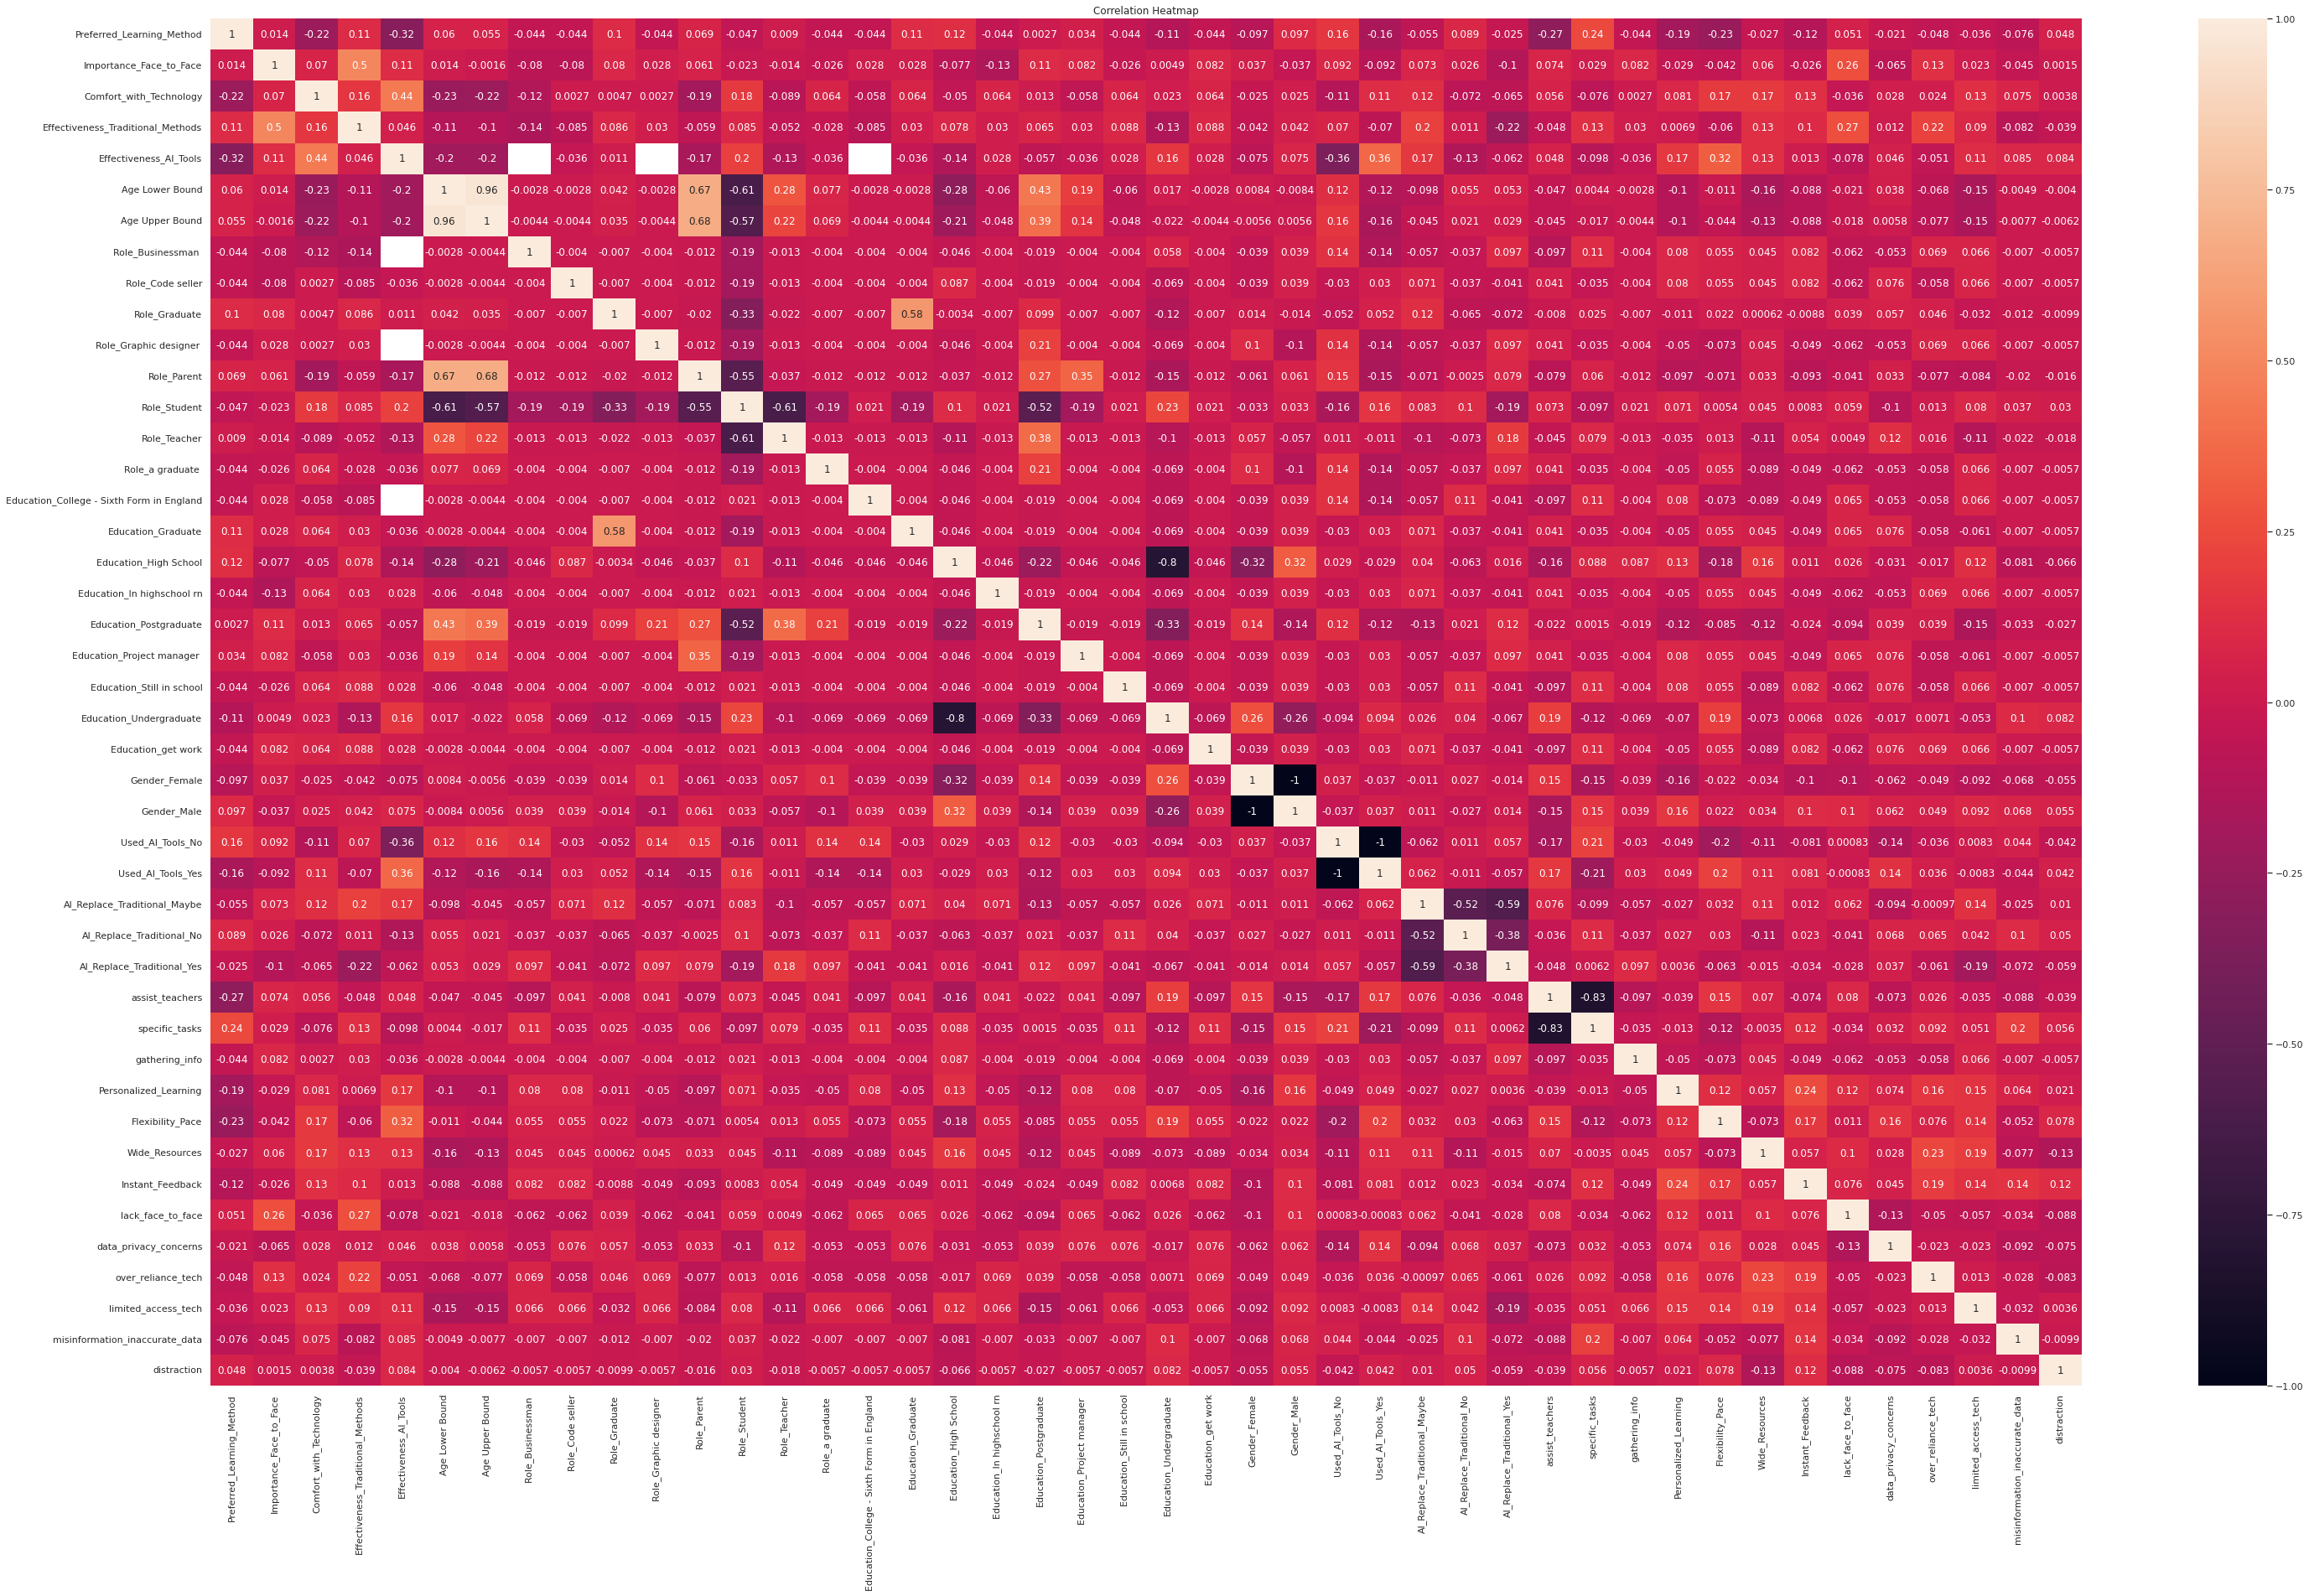

In [170]:
# draw a heat map for df make it 20 ,20 size
plt.figure(figsize=(50, 30))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [171]:
df.head()

,Preferred_Learning_Method,Importance_Face_to_Face,Comfort_with_Technology,Effectiveness_Traditional_Methods,Effectiveness_AI_Tools,Age Lower Bound,Age Upper Bound,Role_Businessman,Role_Code seller,Role_Graduate,Role_Graphic designer,Role_Parent,Role_Student,Role_Teacher,Role_a graduate,Education_College - Sixth Form in England,Education_Graduate,Education_High School,Education_In highschool rn,Education_Postgraduate,Education_Project manager,Education_Still in school,Education_Undergraduate,Education_get work,Gender_Female,Gender_Male,Used_AI_Tools_No,Used_AI_Tools_Yes,AI_Replace_Traditional_Maybe,AI_Replace_Traditional_No,AI_Replace_Traditional_Yes,assist_teachers,specific_tasks,gathering_info,Personalized_Learning,Flexibility_Pace,Wide_Resources,Instant_Feedback,lack_face_to_face,data_privacy_concerns,over_reliance_tech,limited_access_tech,misinformation_inaccurate_data,distraction
0,2,4,5,4,5.0,18.0,24.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,0,0,0,1,1,0,1,1,0,0,1,0,0
1,0,2,2,2,3.0,18.0,24.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,3,4,3,4.0,18.0,24.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,1,0,0,0,1,1,0,0,1,0,1,0,0
3,0,4,5,3,4.0,18.0,24.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,1,0,0,0,1,1,0,0,1,0,1,0,0
4,1,2,5,4,5.0,18.0,24.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,0,0,0,1,0,0,0,0,1,0,0,0,0


In [172]:
# Scale the data usin MinMaxScaler except Preferred_Learning_Method
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
# Select columns to scale
columns_to_scale = df.columns.difference(['Preferred_Learning_Method'])
# Scale the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [173]:
# replace null Effectiveness_AI_Tools with 0
df['Effectiveness_AI_Tools'] = df['Effectiveness_AI_Tools'].fillna(0)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

def greedy_aic_feature_selection(X, y, max_features=30, verbose=True):
    n = len(X)
    remaining_features = list(X.columns)
    selected_features = []
    current_aic = np.inf

    while remaining_features and len(selected_features) < max_features:
        aic_with_candidates = []

        for feature in remaining_features:
            try_features = selected_features + [feature]
            X_subset = X[try_features]

            model = LogisticRegression(max_iter=500, solver='liblinear')
            model.fit(X_subset, y)
            y_pred_proba = model.predict_proba(X_subset)

            ll = -log_loss(y, y_pred_proba, normalize=False)
            num_params = X_subset.shape[1] + 1  # weights + intercept
            aic = 2 * num_params - 2 * ll

            aic_with_candidates.append((aic, feature))

        aic_with_candidates.sort()
        best_new_aic, best_feature = aic_with_candidates[0]

        if best_new_aic < current_aic:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            current_aic = best_new_aic
            if verbose:
                print(f"Selected: {best_feature}, AIC: {best_new_aic:.2f}")
        else:
            # No improvement
            break

    return selected_features


In [175]:
# Features and Target
X = df.drop(columns=['Preferred_Learning_Method'])
y = df['Preferred_Learning_Method']

In [176]:
# Run AIC-based feature selection
selected_features = greedy_aic_feature_selection(X, y, max_features=30)

print("Selected features based on AIC:", selected_features)

# Now reselect X based on best features
X = X[selected_features]


Selected: Effectiveness_AI_Tools, AIC: 416.54
Selected: Effectiveness_Traditional_Methods, AIC: 400.55
Selected: assist_teachers, AIC: 386.41
Selected: Personalized_Learning, AIC: 380.57
Selected: Comfort_with_Technology, AIC: 376.84
Selected: AI_Replace_Traditional_No, AIC: 373.68
Selected: lack_face_to_face, AIC: 372.33
Selected: Flexibility_Pace, AIC: 370.79
Selected: Instant_Feedback, AIC: 369.93
Selected: Role_Parent, AIC: 369.60
Selected: Gender_Male, AIC: 369.27
Selected: Role_Graduate, AIC: 369.05
Selected features based on AIC: ['Effectiveness_AI_Tools', 'Effectiveness_Traditional_Methods', 'assist_teachers', 'Personalized_Learning', 'Comfort_with_Technology', 'AI_Replace_Traditional_No', 'lack_face_to_face', 'Flexibility_Pace', 'Instant_Feedback', 'Role_Parent', 'Gender_Male', 'Role_Graduate']


In [191]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize (always helps neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [265]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# 1. Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                       kernel_regularizer=regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu',
                       kernel_regularizer=regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes

/home/omran-xy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [267]:
# Show me y_train value distribution
y_train.value_counts()

Preferred_Learning_Method
0    130
2     42
1     28
Name: count, dtype: int64

In [268]:
from sklearn.utils.class_weight import compute_class_weight
# Convert y_train to a plain numpy array if it's a pandas Series
y_train_values = y_train.values if hasattr(y_train, 'values') else y_train

# Compute class weights using the values
unique_classes = np.unique(y_train_values)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train_values)
class_weights_dict = dict(zip(unique_classes, class_weights))

# Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


print("Class weights dictionary:", class_weights_dict)

# Then fit with the corrected class weights
history = model.fit(X_train, y_train_values,  # Use values here too if needed
                   epochs=100,
                   batch_size=8,
                   validation_split=0.2,
                   callbacks=[early_stop],
                   class_weight=class_weights_dict)


Class weights dictionary: {0: 0.5128205128205128, 1: 2.380952380952381, 2: 1.5873015873015872}
Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5840 - loss: 1.4201 - val_accuracy: 0.6000 - val_loss: 1.2778
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4974 - loss: 1.3690 - val_accuracy: 0.6000 - val_loss: 1.2518
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5815 - loss: 1.2811 - val_accuracy: 0.6000 - val_loss: 1.2333
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5164 - loss: 1.3879 - val_accuracy: 0.5750 - val_loss: 1.2205
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6084 - loss: 1.1516 - val_accuracy: 0.5750 - val_loss: 1.1962
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5771 - loss: 1.1381 - val_accuracy: 0.5500 - val_loss: 1.1795
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5457 - loss: 1.2216 - val_accuracy: 0.6000 - val_loss: 1.1623
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6356 - loss: 1.0026 - val_accuracy: 0.5500 - val_loss: 

In [269]:
y_test_values = y_test.values if hasattr(y_test, 'values') else y_test

# Evaluate with the properly formatted data
loss, accuracy = model.evaluate(X_test, y_test_values, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and get classification report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test_values, y_pred))

Test Accuracy: 0.5400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.00      0.00      0.00         7
           2       0.33      0.45      0.38        11

    accuracy                           0.54        50
   macro avg       0.35      0.38      0.36        50
weighted avg       0.53      0.54      0.53        50



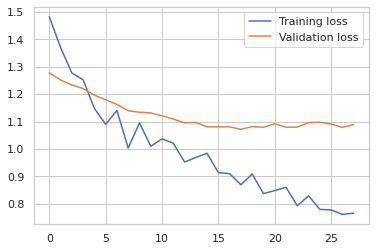

In [270]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [271]:
# Random Forest Implementation for Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns

Training set class distribution:
Preferred_Learning_Method
0    130
2     42
1     28
Name: count, dtype: int64

Test set class distribution:
Preferred_Learning_Method
0    32
2    11
1     7
Name: count, dtype: int64

Cross-validation F1 scores: [0.57257728 0.25       0.39322034 0.44252696 0.5192147 ]
Mean F1 score: 0.4355

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        32
           1       0.00      0.00      0.00         7
           2       0.57      0.36      0.44        11

    accuracy                           0.66        50
   macro avg       0.42      0.42      0.41        50
weighted avg       0.56      0.66      0.59        50


Confusion Matrix:
[[29  0  3]
 [ 7  0  0]
 [ 7  0  4]]


/home/omran-xy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omran-xy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omran-xy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



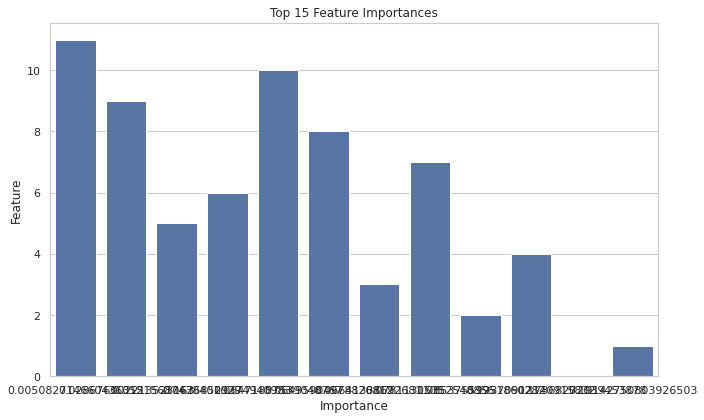

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.5619

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.25      0.14      0.18         7
           2       0.29      0.45      0.36        11

    accuracy                           0.54        50
   macro avg       0.42      0.42      0.41        50
weighted avg       0.56      0.54      0.54        50


SMOTE + Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.50      0.14      0.22         7
           2       0.25      0.27      0.26        11

    accuracy                           0.58        50
   macro avg       0.48      0.40      0.41        50
weighted

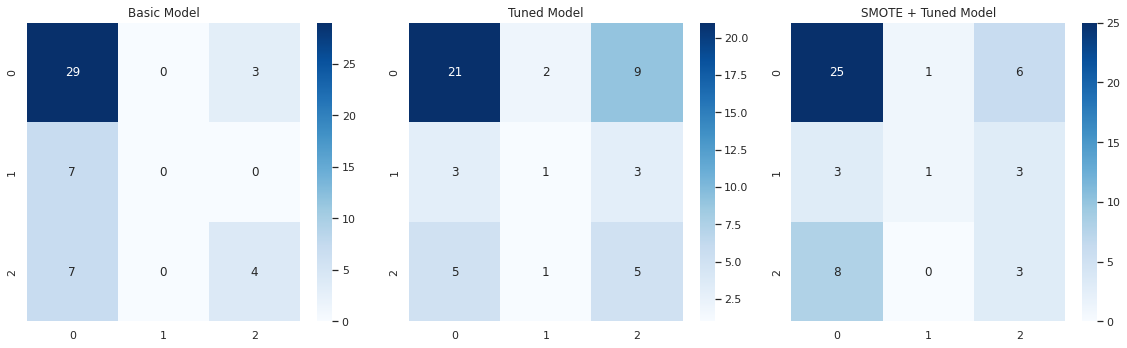


Model saved as 'random_forest_model.pkl'

Selected 6 out of 12 features

Feature-Selected Model Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.00      0.00      0.00         7
           2       0.33      0.45      0.38        11

    accuracy                           0.56        50
   macro avg       0.35      0.39      0.37        50
weighted avg       0.53      0.56      0.54        50



In [ ]:

# 2. Examine class distribution
print("Training set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Create a basic Random Forest model
rf_basic = RandomForestClassifier(
    n_estimators=100,
    random_state=42, 
    class_weight='balanced',
    n_jobs=-1  # Use all available CPU cores
)

# 5. Evaluate with cross-validation
cv_scores = cross_val_score(rf_basic, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean():.4f}")

# 6. Train the model
rf_basic.fit(X_train_scaled, y_train)

# 7. Make predictions
y_pred = rf_basic.predict(X_test_scaled)
y_pred_proba = rf_basic.predict_proba(X_test_scaled)

# 8. Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 9. Visualize feature importance
feature_importances = pd.DataFrame({
    'Feature': range(X_train.shape[1]),  # Replace with actual feature names if available
    'Importance': rf_basic.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 10. Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using a smaller subset for faster grid search if needed
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# 11. Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# 12. Try with SMOTE for handling class imbalance
smote_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        **grid_search.best_params_,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

smote_pipeline.fit(X_train_scaled, y_train)
y_pred_smote = smote_pipeline.predict(X_test_scaled)

print("\nSMOTE + Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_smote))

# 13. Visualize confusion matrices
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Basic Model')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Model')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues')
plt.title('SMOTE + Tuned Model')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

# 14. Save the best model (optional)
import joblib
joblib.dump(smote_pipeline, 'random_forest_model.pkl')
print("\nModel saved as 'random_forest_model.pkl'")

# 15. Optional - Feature Selection using the Random Forest
from sklearn.feature_selection import SelectFromModel

# Select the most important features
selector = SelectFromModel(best_rf, threshold='median')
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

print(f"\nSelected {X_train_selected.shape[1]} out of {X_train_scaled.shape[1]} features")

# Train a new model with selected features
rf_selected = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight='balanced')
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)

print("\nFeature-Selected Model Classification Report:")
print(classification_report(y_test, y_pred_selected))